<a href="https://colab.research.google.com/github/Angga-Sukma-Budi-Darmawan/Time-Series-Forecasting-_-TOWR/blob/main/FORECAST_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Forecasting Sarana Menara Nusantara Tbk**

## **Business Problem Understanding**

### Context
Perusahaan sedang mengamati data historis harga penutupan saham dari PT Sarana Menara Nusantara Tbk (TOWR). Dataset ini mencakup harga penutupan saham harian selama periode waktu tertentu. Data seperti ini umumnya digunakan untuk menganalisis tren, volatilitas, serta untuk membuat prediksi terkait pergerakan harga saham di masa depan. Informasi ini sangat penting bagi investor, analis pasar, dan manajemen perusahaan untuk mengambil keputusan strategis.

### Problem Statement
Bagaimana kita dapat mengidentifikasi pola, tren, dan faktor-faktor yang memengaruhi perubahan harga penutupan saham TOWR untuk mendukung pengambilan keputusan investasi yang lebih baik? Selain itu, bagaimana kita dapat memprediksi harga saham di masa depan berdasarkan data historis yang tersedia?

### Goals
- Jangka Pendek: Memahami tren historis pergerakan harga saham TOWR dan faktor-faktor yang memengaruhinya.
- Jangka Panjang: Mengembangkan model prediktif yang dapat memberikan estimasi harga penutupan saham di masa depan, untuk membantu pengambilan keputusan investasi yang lebih baik.

### Analytic Approach
- Time Series Analysis: Menggunakan teknik analisis deret waktu seperti ARIMA, SARIMA, atau model machine learning seperti Prophet untuk prediksi harga saham.
- Feature Engineering: Membuat fitur tambahan seperti moving averages, RSI, atau indikator teknikal lainnya untuk meningkatkan akurasi model prediktif.
- Model Evaluation: Membandingkan beberapa model untuk memilih yang memiliki kinerja terbaik.

### Metric Evaluation
- Root Mean Square Error (RMSE): Untuk mengukur seberapa jauh prediksi harga dari nilai aktualnya.
- Mean Absolute Error (MAE): Untuk mengukur rata-rata kesalahan absolut dalam prediksi harga.
- R-squared (R²): Untuk mengevaluasi seberapa baik model menjelaskan variasi dalam data harga saham.

## Import Module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#forecasting
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import itertools

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import plotly.graph_objects as go

## Data Understanding

In [ ]:
df=pd.read_csv('TOWR.csv')
df.drop(columns='Unnamed: 0', inplace = True)
df

,Date,Close
0,2021-02-05,945.256226
1,2021-02-08,949.757446
2,2021-02-09,918.248962
3,2021-02-10,967.762268
4,2021-02-11,967.762268
...,...,...
961,2025-01-24,680.000000
962,2025-01-30,670.000000
963,2025-01-31,635.000000
964,2025-02-03,630.000000


In [ ]:
df.isna().sum()

Date     0
Close    0
dtype: int64

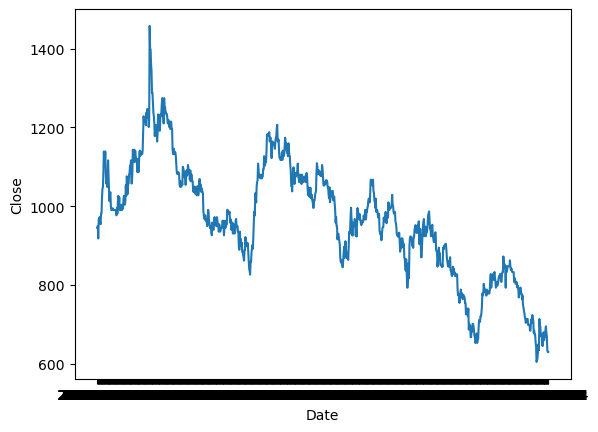

In [ ]:
sns.lineplot(data=df, x='Date', y='Close')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    966 non-null    object 
 1   Close   966 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.2+ KB


In [ ]:
# Convert 'Date' column to datetime using pd.to_datetime()
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Date']

0     2021-02-05
1     2021-02-08
2     2021-02-09
3     2021-02-10
4     2021-02-11
         ...    
961   2025-01-24
962   2025-01-30
963   2025-01-31
964   2025-02-03
965   2025-02-04
Name: Date, Length: 966, dtype: datetime64[ns]

In [ ]:
# Rename columns
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,y
0,2021-02-05,945.256226
1,2021-02-08,949.757446
2,2021-02-09,918.248962
3,2021-02-10,967.762268
4,2021-02-11,967.762268
...,...,...
961,2025-01-24,680.000000
962,2025-01-30,670.000000
963,2025-01-31,635.000000
964,2025-02-03,630.000000


In [ ]:
# Train-test split
df_train = df[df['ds'] < "2024-01-01"]
df_test = df[df['ds'] >= "2024-01-01"]

# Modeling

### **PROPHET**

Prophet memodelkan data deret waktu menggunakan persamaan berikut:

y(t)=g(t)+s(t)+h(t)+ϵ
t
​


di mana:

- 𝑔
(
𝑡
)
g(t) → Model tren yang menangkap perubahan pola jangka panjang dalam data.
- 𝑠
(
𝑡
)
s(t) → Model musiman yang menangkap pola yang berulang, seperti musiman tahunan atau bulanan.
- ℎ
(
𝑡
)
h(t) → Model hari libur atau faktor khusus yang memengaruhi harga saham.
- ϵ
t
​
  → Error atau noise dalam data.

Model lain yang dapat digunakan adalah model prophet. Ada 4 model prophet yang akan diuji, yakni
- Default Model Prophet
- Model Prophet dengan tuning
- Prophet dengan fitur dividen-rups
- Tuning prophet dengan fitur dividen-rups

Dari 4 model tersebut, akan dibandingkan nilai test mae dan mape (error), serta visualisasi hasil prediksi dari tiap model.

**DEFAULT MODEL PROPHET**

22:43:50 - cmdstanpy - INFO - Chain [1] start processing
22:43:50 - cmdstanpy - INFO - Chain [1] done processing


Test MAE : 50.295375850533446
Test MAPE : 0.06523066592826628


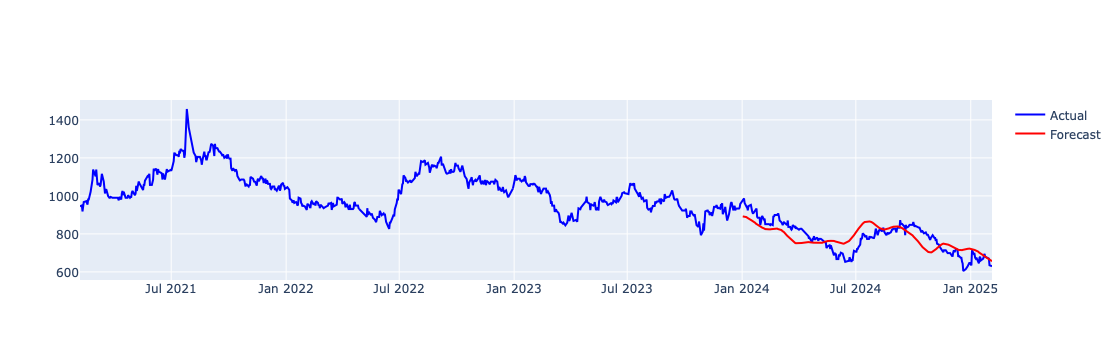

In [ ]:
#define model
model = Prophet()

#fit model
model.fit(df_train)

#Start Date & End Date
start_date = '2024-01-01'
end_date = '2025-02-05'

# Make predictions
future = model.make_future_dataframe(periods=730)
future = future[(future['ds'] >= start_date) & (future['ds'] <= end_date)]
forecast = model.predict(future)

# Handle 'ds' column if it exists in forecast but not in df
if 'ds' not in df_train.columns:
    df_train['ds'] = df_train.index  # Assuming index is suitable for 'ds'

if 'ds' not in df_test.columns:
    df_test['ds'] = df_test.index

# Handle rows in forecast that have 'ds' not in df
forecast = forecast[forecast['ds'].isin(df_test['ds'])]

# Compute MAE
mae = mean_absolute_error(df_test['y'], forecast['yhat'])
mape = mean_absolute_percentage_error(df_test['y'], forecast['yhat'])
print(f'Test MAE : {mae}')
print(f'Test MAPE : {mape}')

# Plot results
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='red')))
fig.show()

Dari baseline model prophet, terlihat bahwa hasil forecast cukup berhasil menangkap pola fluktuasi harga saham pada data validasi (tahun 2024). Nilai MAE 50,29 dan MAPE 6,52% menunjukkan performa default model prophet yang cukup baik, tetapi masih dapat dikembangkan, terutama untuk menangkap pola musiman yang terjadi, yakni pada pertengahan tahun (Jun-Jul) dan akhir tahun (Des-Jan). Walaupun model berhasil menangkap pola fluktuasi tersebut, hasil forecast pada bulan jun-jul 2024 dan dec-jan 2024 belum cukup curam.

**HYPERPARAMETER TUNING-PROPHET**

Kemudian, model prophet yang di-tuning akan dibandingkan dengan model prophet sebelum di-tuning.

#### **Beberapa hyperparameter utama yang disesuaikan dalam model ini:**

-`changepoint_prior_scale`: Mengontrol fleksibilitas tren. Nilai lebih kecil membuat tren lebih halus, sedangkan nilai lebih besar memungkinkan lebih banyak perubahan tren.

-`seasonality_prior_scale`: Mengontrol seberapa kuat komponen musiman dalam model.

-`yearly_fourier_order`: Menentukan kompleksitas pola musiman tahunan. Nilai lebih tinggi menangkap lebih banyak detail dalam pola musiman.

#### **Pencarian Grid untuk Optimasi Hyperparameter**

Tuning dilakukan dengan metode grid search, di mana semua kombinasi parameter diuji satu per satu, model dilatih, dan performanya diukur menggunakan MAE.

Langkah-langkah Grid Search:

1. Buat kombinasi hyperparameter berdasarkan grid yang telah didefinisikan.
2. Latih model Prophet untuk setiap kombinasi.
3. Lakukan prediksi menggunakan dataset validasi (tahun 2024).
4. Hitung MAE antara harga saham aktual dan harga yang diprediksi.
5. Simpan parameter terbaik yang menghasilkan nilai MAE paling rendah.

23:06:20 - cmdstanpy - INFO - Chain [1] start processing
23:06:20 - cmdstanpy - INFO - Chain [1] done processing
23:06:20 - cmdstanpy - INFO - Chain [1] start processing
23:06:20 - cmdstanpy - INFO - Chain [1] done processing
23:06:21 - cmdstanpy - INFO - Chain [1] start processing
23:06:21 - cmdstanpy - INFO - Chain [1] done processing
23:06:21 - cmdstanpy - INFO - Chain [1] start processing
23:06:21 - cmdstanpy - INFO - Chain [1] done processing
23:06:21 - cmdstanpy - INFO - Chain [1] start processing
23:06:21 - cmdstanpy - INFO - Chain [1] done processing
23:06:22 - cmdstanpy - INFO - Chain [1] start processing
23:06:22 - cmdstanpy - INFO - Chain [1] done processing
23:06:22 - cmdstanpy - INFO - Chain [1] start processing
23:06:22 - cmdstanpy - INFO - Chain [1] done processing
23:06:23 - cmdstanpy - INFO - Chain [1] start processing
23:06:23 - cmdstanpy - INFO - Chain [1] done processing
23:06:23 - cmdstanpy - INFO - Chain [1] start processing
23:06:23 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5.0, 'yearly_fourier_order': 5}
Best Test MAE: 50.110289332039535


23:06:36 - cmdstanpy - INFO - Chain [1] done processing


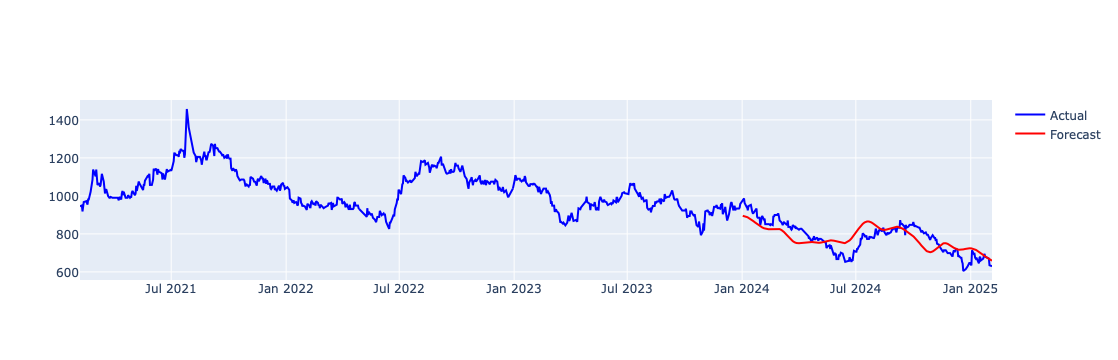

In [ ]:
# Define hyperparameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1],  # Controls trend flexibility
    'seasonality_prior_scale': [1.0, 5.0, 10.0],  # Controls seasonality flexibility
    'yearly_fourier_order': [5, 10, 15],  # Higher values capture more complex yearly seasonality
    # 'six_months_fourier_order': [3, 6, 9]  # Controls 6-month seasonal pattern complexity
}

# Generate all combinations of hyperparameters
all_params = [dict(zip(param_grid.keys(), values)) for values in itertools.product(*param_grid.values())]

best_params = None
best_mae = float("inf")

# Grid search over hyperparameters
for params in all_params:
    model = Prophet(
        seasonality_mode='additive',
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False
    )

    # Add strong yearly seasonality
    model.add_seasonality(name='yearly', period=365.25, fourier_order=params['yearly_fourier_order'])
    # Add custom 6-month seasonality
    # model.add_seasonality(name='six_months', period=182.5, fourier_order=params['six_months_fourier_order'])

    # Train model
    model.fit(df_train)

    # Make predictions
    future = model.make_future_dataframe(periods=730)
    # future = future[(future['ds'] >= start_date) & (future['ds'] <= end_date)]
    forecast = model.predict(future)
    # Handle 'ds' column if it exists in forecast but not in df
    if 'ds' not in df_train.columns:
        df_train['ds'] = df_train.index  # Assuming index is suitable for 'ds'

    if 'ds' not in df_test.columns:
        df_test['ds'] = df_test.index

    # Handle rows in forecast that have 'ds' not in df
    forecast = forecast[forecast['ds'].isin(df_test['ds'])]

    # Compute MAE
    mae = mean_absolute_error(df_test['y'], forecast['yhat'])

    # Store best parameters
    if mae < best_mae:
        best_mae = mae
        best_params = params

print(f"Best Parameters: {best_params}")
print(f"Best Test MAE: {best_mae}")

# Train final model with best parameters
final_model = Prophet(
    seasonality_mode='additive',
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
# Add strong yearly seasonality
final_model.add_seasonality(name='yearly', period=365.25, fourier_order=best_params['yearly_fourier_order'])
# final_model.add_seasonality(name='six_months', period=182.5, fourier_order=best_params['six_months_fourier_order'])
final_model.fit(df_train)  # Train on full dataset



# Create future DataFrame for 2024
future = model.make_future_dataframe(periods=730)
# future = future[(future['ds'] >= start_date) & (future['ds'] <= end_date)]
forecast = final_model.predict(future)
# Handle 'ds' column if it exists in forecast but not in df
if 'ds' not in df_train.columns:
    df_train['ds'] = df_train.index  # Assuming index is suitable for 'ds'

if 'ds' not in df_test.columns:
    df_test['ds'] = df_test.index

# Handle rows in forecast that have 'ds' not in df
forecast = forecast[forecast['ds'].isin(df_test['ds'])]

# Plot results
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='red')))
fig.show()

In [ ]:
# Compute MAE & MAPE
mae = mean_absolute_error(df_test['y'], forecast['yhat'])
mape = mean_absolute_percentage_error(df_test['y'], forecast['yhat'])
print(f'Test MAPE: {mape}')
print(f'Test MAE : {mae}')

Test MAPE: 0.06515727013466308
Test MAE : 50.110289332039535


18 jun 21
22 dec 21
30 jun 22
22 dec 22
31 may 23
22 dec 23

**PROPHET WITH DIVIDENT-RUPS**

Berdasarkan riset kami, ditemukan adanya pola seasonal pada TOWR, dimana dividen dilakukan pada pertengahan (jun) dan akhir tahun (desember), serta RUPS pada bulan Mei. Kedua faktor ini dapat menentukan fluktuasi harga saham. Oleh karena itu, model prophet dengan fitur ini akan diuji dan dibandingkan dengan model-model lain yang telah dibuat pada tahapan sebelumnya.

In [ ]:
df2=pd.read_csv('TOWR.csv')
df2.drop(columns='Unnamed: 0', inplace = True)
df2

,Date,Close
0,2021-02-05,945.256226
1,2021-02-08,949.757446
2,2021-02-09,918.248962
3,2021-02-10,967.762268
4,2021-02-11,967.762268
...,...,...
961,2025-01-24,680.000000
962,2025-01-30,670.000000
963,2025-01-31,635.000000
964,2025-02-03,630.000000


In [ ]:
# Convert 'Date' column to datetime using pd.to_datetime()
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')

In [ ]:
# Rename columns
df2 = df2.rename(columns={'Date': 'ds', 'Close': 'y'})
df2

,ds,y
0,2021-02-05,945.256226
1,2021-02-08,949.757446
2,2021-02-09,918.248962
3,2021-02-10,967.762268
4,2021-02-11,967.762268
...,...,...
961,2025-01-24,680.000000
962,2025-01-30,670.000000
963,2025-01-31,635.000000
964,2025-02-03,630.000000


In [ ]:
# Extract month from the 'ds' column
df2['month'] = df2['ds'].dt.month

# Create a binary indicator for dividend payment months
df2['before_indicator'] = (df2['month'].isin([5,6])).astype(int)
df2['after_indicator'] = (df2['month'].isin([7,8])).astype(int)

23:08:00 - cmdstanpy - INFO - Chain [1] start processing
23:08:00 - cmdstanpy - INFO - Chain [1] done processing


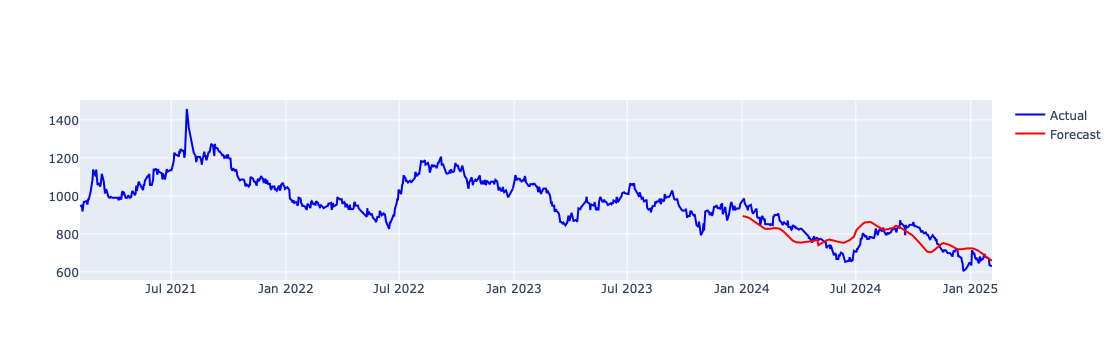

In [ ]:
# Train-test split
df_train2 = df2[df2['ds'] < "2024-01-01"]
df_test2 = df2[df2['ds'] >= "2024-01-01"]

# Define Prophet model
model = Prophet(seasonality_mode="additive", yearly_seasonality=True)
model.add_regressor("before_indicator")  # Add dividend as an external regressor
model.add_regressor("after_indicator")
# Fit model
model.fit(df_train2)

# Create future dataframe
future = model.make_future_dataframe(periods=730)  # Predict 1 year ahead
future['month'] = future['ds'].dt.month
future['before_indicator'] = (future['month'].isin([5,6])).astype(int)
future['after_indicator'] = (future['month'].isin([7,8])).astype(int)# Add regressor
future = future[(future['ds'] >= start_date) & (future['ds'] <= end_date)]

# Make predictions
forecast = model.predict(future)
if 'ds' not in df_train2.columns:
    df_train2['ds'] = df_train.index  # Assuming index is suitable for 'ds'

if 'ds' not in df_test2.columns:
    df_test2['ds'] = df_test2.index

# Handle rows in forecast that have 'ds' not in df
forecast = forecast[forecast['ds'].isin(df_test2['ds'])]
# Plot results
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['ds'], y=df2['y'], mode='lines', name='Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='red')))
fig.show()

In [ ]:
# Compute MApE
mae = mean_absolute_error(df_test2['y'], forecast['yhat'])
mape = mean_absolute_percentage_error(df_test2['y'], forecast['yhat'])
print(f'Test MAPE: {mape}')
print(f'Test MAE : {mae}')

Test MAPE: 0.0654389451956569
Test MAE : 50.2365748814804


Fitur bulan dividen-rups sedikit meningkatkan performa model, terlihat dengan penurunan angka MAE dan MAPE. Kemudian, model prophet-dividen akan dituning dan dibandingkan performanya dengan tanpa tuning.

# HYPERTUNING PROPHET-DIVIDENT

23:10:07 - cmdstanpy - INFO - Chain [1] start processing
23:10:07 - cmdstanpy - INFO - Chain [1] done processing
23:10:08 - cmdstanpy - INFO - Chain [1] start processing
23:10:08 - cmdstanpy - INFO - Chain [1] done processing
23:10:08 - cmdstanpy - INFO - Chain [1] start processing
23:10:08 - cmdstanpy - INFO - Chain [1] done processing
23:10:09 - cmdstanpy - INFO - Chain [1] start processing
23:10:09 - cmdstanpy - INFO - Chain [1] done processing
23:10:09 - cmdstanpy - INFO - Chain [1] start processing
23:10:09 - cmdstanpy - INFO - Chain [1] done processing
23:10:10 - cmdstanpy - INFO - Chain [1] start processing
23:10:10 - cmdstanpy - INFO - Chain [1] done processing
23:10:10 - cmdstanpy - INFO - Chain [1] start processing
23:10:10 - cmdstanpy - INFO - Chain [1] done processing
23:10:10 - cmdstanpy - INFO - Chain [1] start processing
23:10:11 - cmdstanpy - INFO - Chain [1] done processing
23:10:11 - cmdstanpy - INFO - Chain [1] start processing
23:10:11 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5.0, 'yearly_fourier_order': 5}
Best Test MAE: 49.9234148081895


23:10:25 - cmdstanpy - INFO - Chain [1] done processing


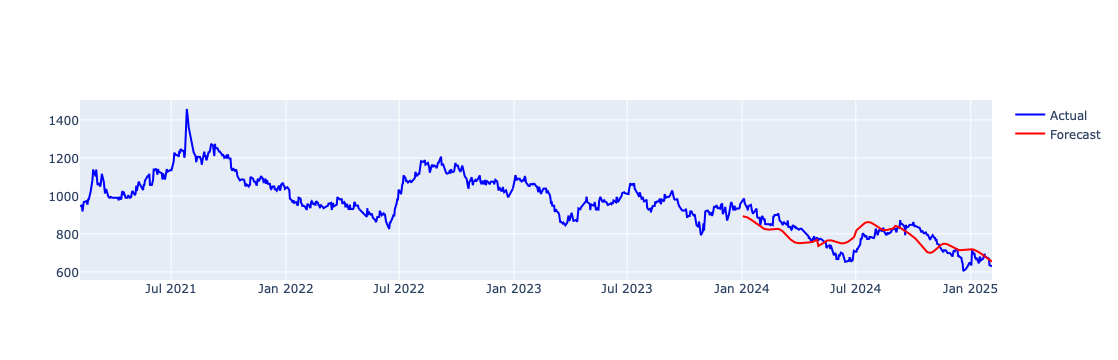

In [ ]:
# Define hyperparameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1],  # Controls trend flexibility
    'seasonality_prior_scale': [1.0, 5.0, 10.0],  # Controls seasonality flexibility
    'yearly_fourier_order': [5, 10, 15],  # Higher values capture more complex yearly seasonality
    # 'six_months_fourier_order': [3, 6, 9]  # Controls 6-month seasonal pattern complexity
}

# Generate all combinations of hyperparameters
all_params = [dict(zip(param_grid.keys(), values)) for values in itertools.product(*param_grid.values())]

best_params = None
best_mae = float("inf")

# Grid search over hyperparameters
for params in all_params:
    model = Prophet(
        seasonality_mode='additive',
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False
    )
    # Add strong yearly seasonality
    model.add_seasonality(name='yearly', period=365.25, fourier_order=params['yearly_fourier_order'])
    # Add custom 6-month seasonality
    # model.add_seasonality(name='six_months', period=182.5, fourier_order=params['six_months_fourier_order'])
    model.add_regressor("before_indicator")
    model.add_regressor("after_indicator")

    # Train model
    model.fit(df_train2)

    # Make predictions
    future = model.make_future_dataframe(periods=730)
    future['month'] = future['ds'].dt.month
    future['before_indicator'] = (future['month'].isin([5,6])).astype(int)
    future['after_indicator'] = (future['month'].isin([7,8])).astype(int)
    forecast = model.predict(future)
    # Handle 'ds' column if it exists in forecast but not in df
    if 'ds' not in df_train2.columns:
        df_train2['ds'] = df_train2.index  # Assuming index is suitable for 'ds'

    if 'ds' not in df_test2.columns:
        df_test2['ds'] = df_test2.index

    # Handle rows in forecast that have 'ds' not in df
    forecast = forecast[forecast['ds'].isin(df_test2['ds'])]

    # Compute MAE
    mae = mean_absolute_error(df_test2['y'], forecast['yhat'])

    # Store best parameters
    if mae < best_mae:
        best_mae = mae
        best_params = params

print(f"Best Parameters: {best_params}")
print(f"Best Test MAE: {best_mae}")

# Train final model with best parameters
final_model = Prophet(
    seasonality_mode='additive',
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Add strong yearly seasonality
final_model.add_seasonality(name='yearly', period=365.25, fourier_order=best_params['yearly_fourier_order'])
# final_model.add_seasonality(name='six_months', period=182.5, fourier_order=best_params['six_months_fourier_order'])
final_model.add_regressor("before_indicator")
final_model.add_regressor("after_indicator")

final_model.fit(df_train2)  # Train on full dataset



# Create future DataFrame for 2024
future = model.make_future_dataframe(periods=730)
future['month'] = future['ds'].dt.month
future['before_indicator'] = (future['month'].isin([5,6])).astype(int)
future['after_indicator'] = (future['month'].isin([7,8])).astype(int)
forecast = final_model.predict(future)
# Handle 'ds' column if it exists in forecast but not in df
if 'ds' not in df_train2.columns:
    df_train2['ds'] = df_train2.index  # Assuming index is suitable for 'ds'

if 'ds' not in df_test2.columns:
    df_test2['ds'] = df_test2.index

# Handle rows in forecast that have 'ds' not in df
forecast = forecast[forecast['ds'].isin(df_test2['ds'])]

# Plot results
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['ds'], y=df2['y'], mode='lines', name='Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='red')))
fig.show()

# Best Model

In [ ]:
# Compute MAE & MAPE
mae = mean_absolute_error(df_test2['y'], forecast['yhat'])
mape = mean_absolute_percentage_error(df_test2['y'], forecast['yhat'])
print(f'Test MAPE: {mape}')
print(f'Test MAE : {mae}')

Test MAPE: 0.06473557789463176
Test MAE : 49.9234148081895


# Kesimpulan

#### Model Prediksi Saham TOWR
- Menggunakan Prophet, model prediksi menunjukkan performa yang baik dengan MAE Rp49,92 dan MAPE 6,47%, mengindikasikan tingkat akurasi yang cukup tinggi.
#### Faktor Utama Fluktuasi Harga
- Pergerakan harga saham TOWR dipengaruhi secara signifikan oleh tanggal pembagian dividen dan RUPS tahunan, yang memicu volatilitas di pasar.

# Rekomendasi

#### Perhatikan press release pasca RUPS

- Press release setelah Rapat Umum Pemegang Saham (RUPS) sering mengandung informasi penting tentang strategi perusahaan, dividen, atau perubahan kebijakan yang dapat memengaruhi pergerakan harga saham.
#### Trend Sell dan Penurunan Harga Pasca Pembagian Dividen
- Setelah expired dividend date, harga saham cenderung turun karena investor yang hanya mengejar dividen menjual sahamnya. Ini bisa menjadi peluang untuk membeli di harga rendah atau mengantisipasi volatilitas.
#### Tanggal Pembagian Dividen (Cum Date & Expired Date)
- Cum date adalah batas akhir pembelian saham untuk mendapatkan dividen, sedangkan ex-date adalah hari pertama saham diperdagangkan tanpa hak dividen. Investor perlu memahami ini untuk strategi beli/jual optimal.
#### Tren Sentimen Positif pada Q1 (January Effect)
- January Effect mengacu pada kecenderungan harga saham naik di awal tahun karena investor kembali aktif setelah akhir tahun. Ini bisa dimanfaatkan untuk masuk pasar lebih awal sebelum tren bullish terjadi.